# Generating plots for the documentation

In [86]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import qp
import matplotlib as mpl

In [4]:
xvals= np.array([0,0.5,1,1.5,2])
yvals = np.array([[0.01, 0.2,0.3,0.2,0.01],[0.09,0.25,0.2,0.1,0.01]])
ancil = {'ids':[5,8]}
ens = qp.interp.create_ensemble(xvals, yvals,ancil=ancil)

In [71]:
bins = np.linspace(np.min(xvals)-0.2,np.max(xvals)+0.2,16)
ens_h = qp.convert(ens,"hist", bins=bins)

In [45]:
ens_h.objdata

{'pdfs': array([[0.     , 0.24375, 0.2925 , 0.2375 , 0.51125, 0.72   , 0.72   ,
         0.76   , 0.6875 , 0.69   , 0.55   , 0.30625, 0.315  , 0.21625,
         0.     ],
        [0.     , 0.81375, 0.385  , 0.415  , 0.665  , 0.73875, 0.77625,
         0.61   , 0.51125, 0.4775 , 0.3575 , 0.2025 , 0.16875, 0.12875,
         0.     ]])}

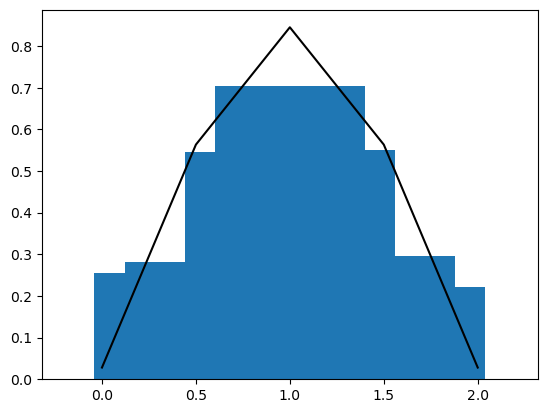

In [72]:

plt.bar(ens_h.x_samples(), ens_h[0].objdata["pdfs"],width=ens_h.x_samples()[1]- ens_h.x_samples()[0])
plt.plot(ens.x_samples(), ens[0].pdf(ens.x_samples()),c='k')

In [ ]:
npdf = 3
nvals = 10
xvals2 = np.linspace(0,5,nvals)
loc = np.expand_dims(np.linspace(0.5, 2.5, npdf),-1)
scale = np.expand_dims(np.linspace(0.2, 1.2, npdf),-1)
norm_yvals = stats.norm(loc=loc, scale=scale).rvs(size=(npdf, nvals))
print(f"norm_yvals: {norm_yvals}")
yvals2 = norm_yvals * (
    1.0 + 0.1 * np.random.uniform(size=(npdf,nvals))
)
print(f"yvals2: {yvals2}")

norm_yvals: [[ 0.23857816  0.44608055  0.35506189  0.9311859   0.54334775  0.27702059
   0.55037528  0.10977929  0.60639402  0.69375236]
 [ 2.06295892  2.5817364   1.29610323  1.22444619  2.76940527  1.2033887
   0.33230147 -0.09674468  1.65216056  1.66257933]
 [ 2.49262447  1.26378227  3.82412006  1.22369712  1.92606941  2.71947306
   1.82972882  2.0016106   1.97585733  3.60981854]]
yvals2: [[ 0.24596817  0.455616    0.36127341  0.93447099  0.58165313  0.28228202
   0.5504178   0.11385667  0.65587666  0.72542631]
 [ 2.21537067  2.69780584  1.33616347  1.31152104  2.93686262  1.2189944
   0.34185041 -0.10029401  1.77966669  1.81907422]
 [ 2.65969016  1.35637609  4.02864639  1.31876477  1.92828263  2.87542587
   1.86923577  2.16931588  2.154255    3.76427369]]


In [ ]:
npdf = 3
nvals = 50
xvals2 = np.linspace(0,5,nvals)
loc = np.expand_dims(np.linspace(0.7, 2.5, npdf),-1)
scale=np.expand_dims(np.linspace(0.2, 1.2, npdf),-1)
norm_yvals = stats.norm(loc=loc, scale=scale).pdf(xvals2)
yvals2 = norm_yvals * (
    1.0 + 0.1 * np.random.uniform(size=(npdf,nvals))
)

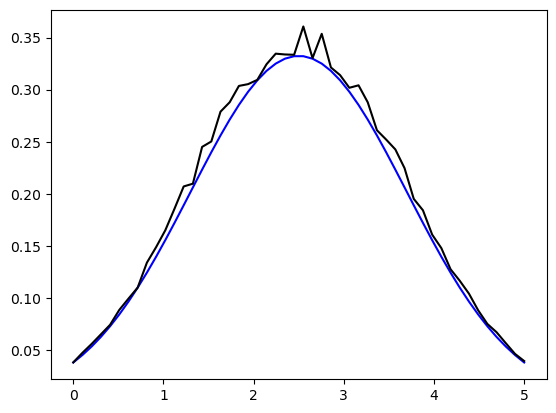

In [54]:
plt.plot(xvals2,norm_yvals[2],c='b')
plt.plot(xvals2,yvals2[2],c='k')

In [77]:
ens_i = qp.interp.create_ensemble(xvals=xvals2,yvals=norm_yvals)

In [78]:
bins = np.linspace(0,5,26)
ens_h = qp.convert(ens_i, "hist", bins=bins)

In [101]:
colours = ["#2980B9", "#331E38"]

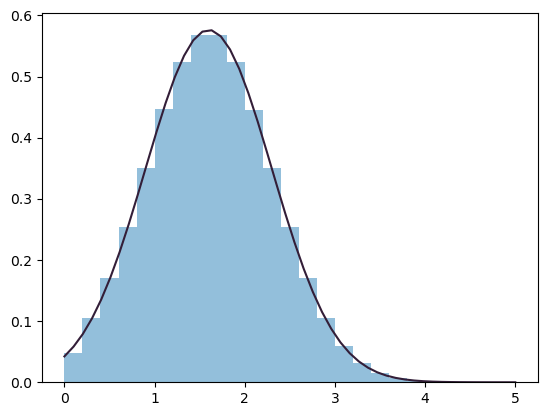

In [120]:
plt.bar(ens_h.x_samples(),ens_h[1].objdata["pdfs"], width=ens_h.x_samples()[1]-ens_h.x_samples()[0], alpha=0.5, color = colours[0])
plt.plot(ens_i.metadata["xvals"],ens_i[1].objdata["yvals"],c=colours[1])
#plt.savefig("../assets/basic_usage_convert_comparison.svg",transparent=True)

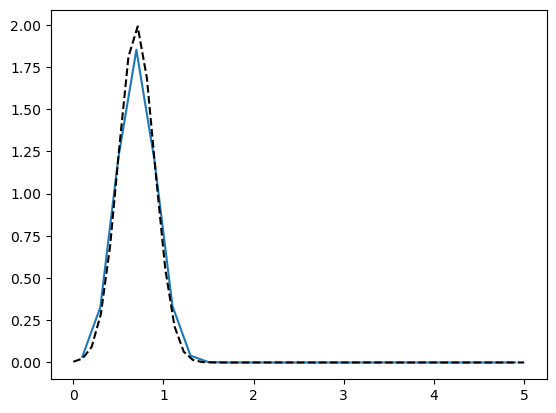

In [106]:
plt.plot(ens_h.x_samples(),ens_h[0].pdf(ens_h.x_samples()))
plt.plot(ens_i.x_samples(),ens_i[0].pdf(ens_i.x_samples()), c='k', linestyle="--")

In [104]:
ens_h.pdf(1.2)

array([[0.33411264],
       [0.44635119],
       [0.1754643 ]])

In [105]:
ens_i.pdf(1.2)

array([[0.10014283],
       [0.48897684],
       [0.19207249]])

In [108]:
ens_i

Ensemble(the_class=interp,shape=(3, 50))

In [114]:
ens_i.metadata["pdf_name"]

array([b'interp'], dtype='|S6')

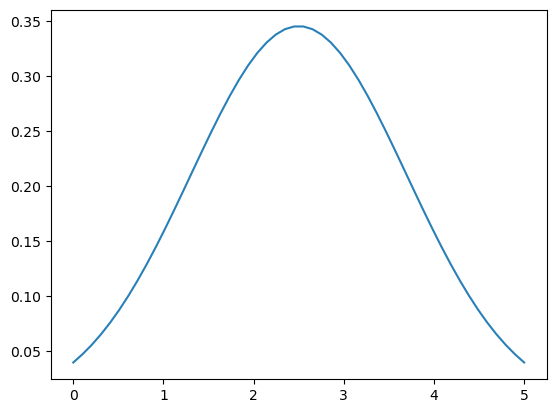

In [118]:
plt.plot(ens_i.metadata["xvals"],ens_i.objdata["yvals"][2],c=colours[0])
plt.savefig("../assets/basic_usage_plot_data.svg",transparent=True)

In [119]:
ens_h

Ensemble(the_class=hist,shape=(3, 25))